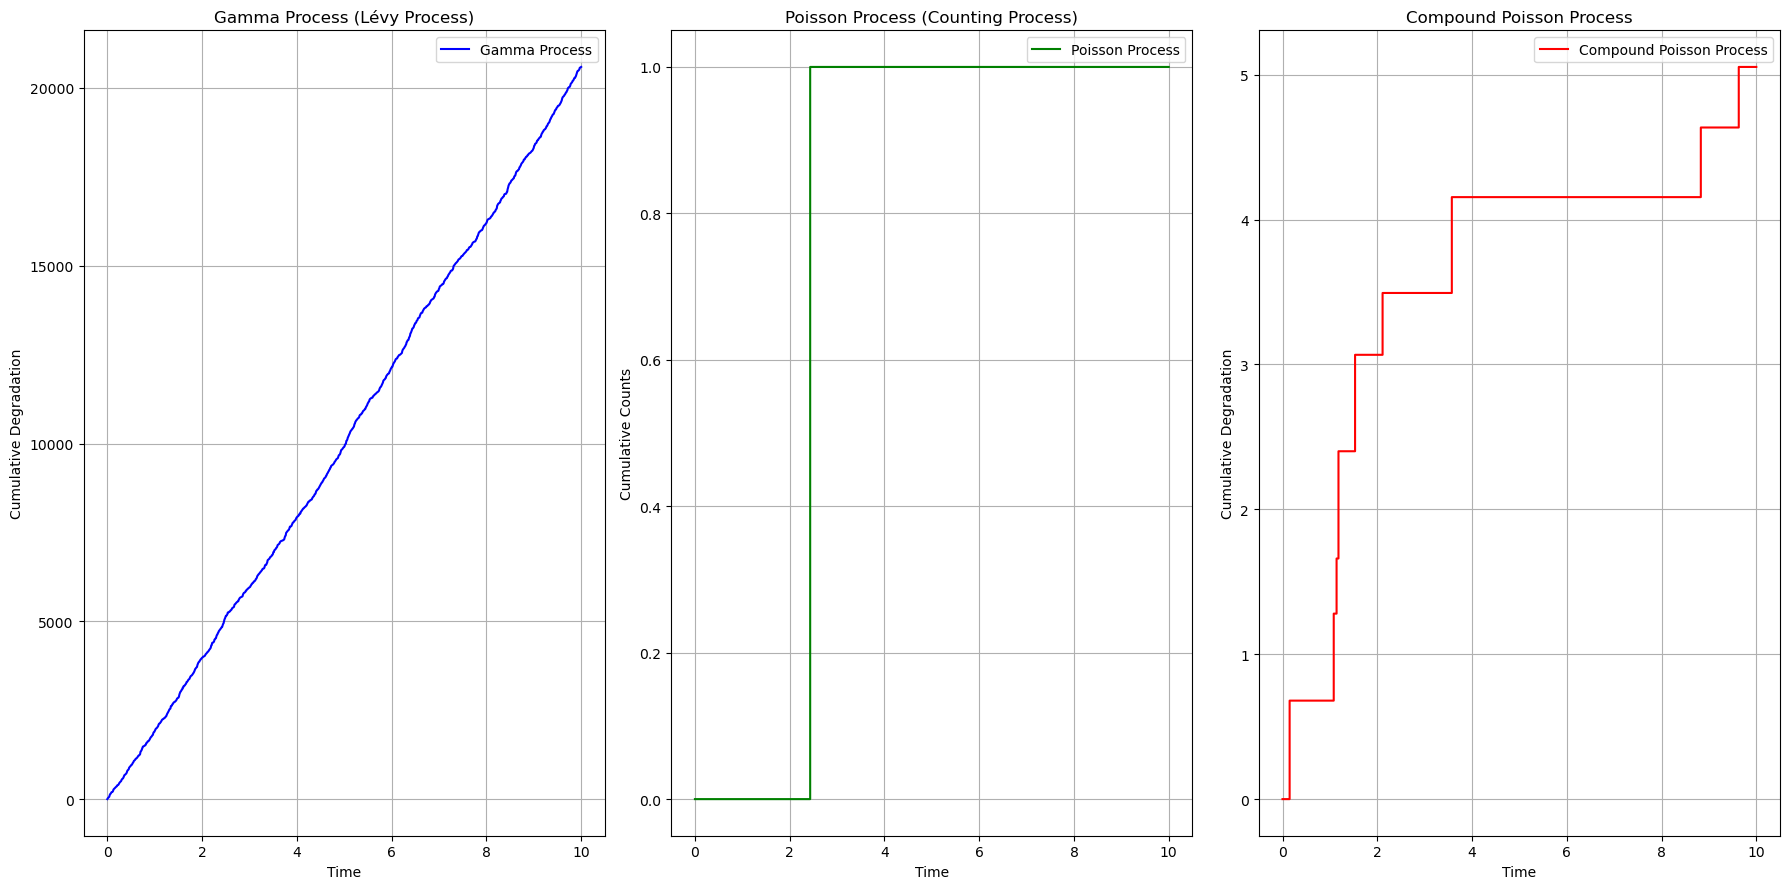

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson, norm

# 设置参数
np.random.seed(42)
T = 10  # 时间总长
n_points = 1000  # 时间点数量
lambda_poisson = 0.5  # 泊松过程强度
gamma_shape = 2  # 伽马过程的形状参数
gamma_scale = 10  # 伽马过程的尺度参数
jump_mean = 0.5  # 复合泊松过程的跳跃均值
jump_std = 0.2  # 复合泊松过程的跳跃标准差

# 生成时间轴
t = np.linspace(0, T, n_points)

# 1. 伽马过程
gamma_increments = gamma.rvs(gamma_shape, scale=gamma_scale, size=n_points-1)
gamma_process = np.insert(np.cumsum(gamma_increments), 0, 0)

# 2. 泊松过程
poisson_counts = poisson.rvs(lambda_poisson * T / (n_points-1), size=n_points-1)
poisson_process = np.insert(np.cumsum(poisson_counts), 0, 0)

# 3. 复合泊松过程
compound_counts = poisson.rvs(lambda_poisson * T / (n_points-1), size=n_points-1)
compound_jumps = norm.rvs(loc=jump_mean, scale=jump_std, size=n_points-1) * compound_counts
compound_process = np.insert(np.cumsum(compound_jumps), 0, 0)

# 绘制图像
plt.figure(figsize=(18, 9))

plt.subplot(1, 3, 1)
plt.plot(t, gamma_process, label='Gamma Process', color='blue')
plt.title('Gamma Process (Lévy Process)')
plt.xlabel('Time')
plt.ylabel('Cumulative Degradation')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.step(t, poisson_process, label='Poisson Process', color='green', where='post')
plt.title('Poisson Process (Counting Process)')
plt.xlabel('Time')
plt.ylabel('Cumulative Counts')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.step(t, compound_process, label='Compound Poisson Process', color='red', where='post')
plt.title('Compound Poisson Process')
plt.xlabel('Time')
plt.ylabel('Cumulative Degradation')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

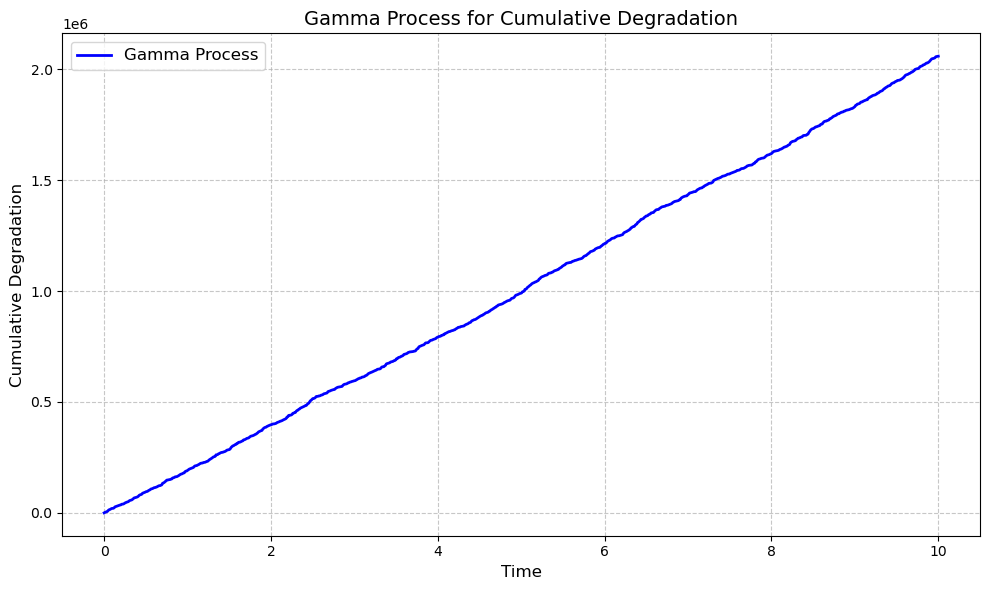

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# 设置参数
np.random.seed(42)
T = 10  # 时间总长
n_points = 1000  # 时间点数量
gamma_shape = 2  # 伽马过程的形状参数
gamma_scale = 1000# 伽马过程的尺度参数

# 生成时间轴
t = np.linspace(0, T, n_points)

# 生成伽马过程
gamma_increments = gamma.rvs(gamma_shape, scale=gamma_scale, size=n_points-1)
gamma_process = np.insert(np.cumsum(gamma_increments), 0, 0)

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(t, gamma_process, label='Gamma Process', color='blue', linewidth=2)
plt.title('Gamma Process for Cumulative Degradation', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Cumulative Degradation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("Gamma.png")
plt.show()

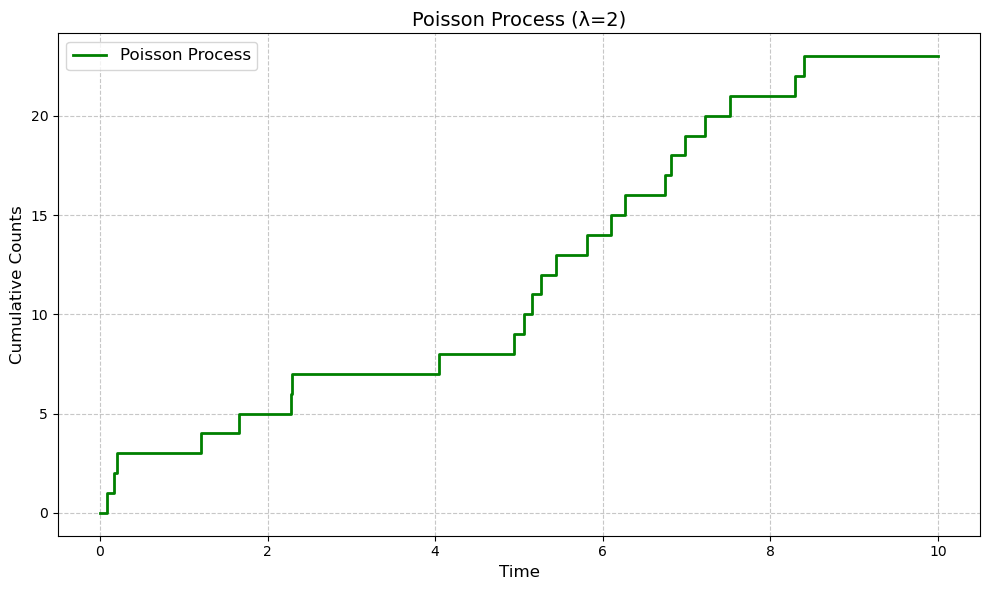

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 设置参数
np.random.seed(42)
T = 10  # 时间总长
lambda_poisson = 2  # 增加泊松过程强度

# 生成事件发生时间
event_times = np.cumsum(np.random.exponential(1/lambda_poisson, size=poisson.rvs(lambda_poisson*T)))
event_times = event_times[event_times < T]  # 截断到时间T

# 创建阶梯函数
t = np.sort(np.concatenate([event_times, [0, T]]))
counts = np.arange(1, len(event_times)+1)
poisson_process = np.concatenate([[0], np.repeat(counts, 2), [counts[-1]]])
t_plot = np.concatenate([[0], np.repeat(event_times, 2), [T]])

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(t_plot, poisson_process, label='Poisson Process', color='green', linewidth=2, drawstyle='steps-post')
plt.title('Poisson Process (λ=2)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Cumulative Counts', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("Poisson.png")
plt.show()

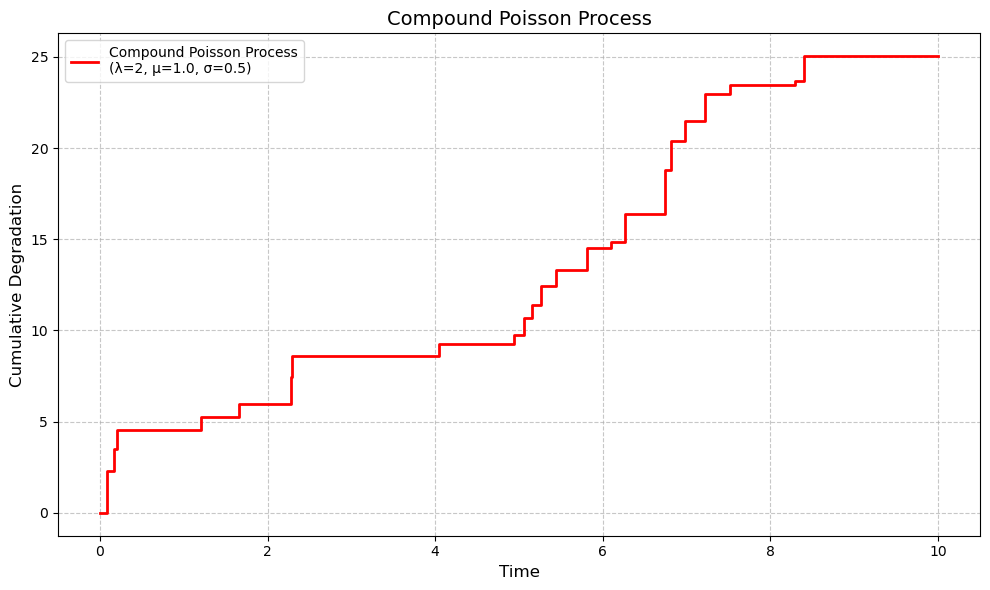

In [12]:
from scipy.stats import norm

# 设置参数
jump_mean = 1.0  # 跳跃均值
jump_std = 0.5  # 跳跃标准差

# 生成跳跃幅度
jump_sizes = norm.rvs(loc=jump_mean, scale=jump_std, size=len(event_times))

# 创建阶梯函数
compound_process = np.concatenate([[0], np.repeat(np.cumsum(jump_sizes), 2), [np.sum(jump_sizes)]])

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(t_plot, compound_process, label=f'Compound Poisson Process\n(λ=2, μ={jump_mean}, σ={jump_std})', 
         color='red', linewidth=2, drawstyle='steps-post')
plt.title('Compound Poisson Process', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Cumulative Degradation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig("Compound_Poisson.png")
plt.show()

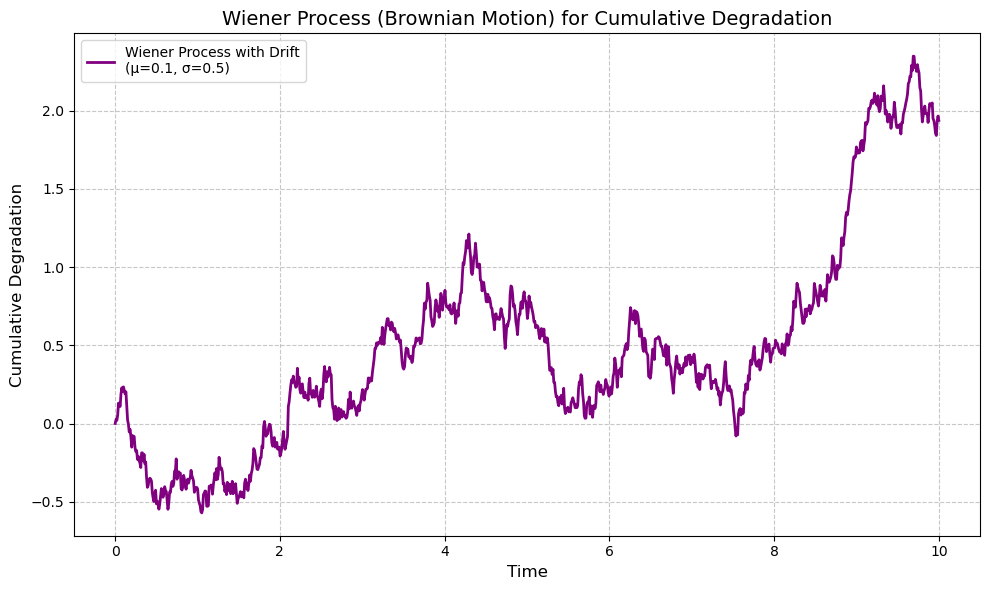

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
np.random.seed(42)
T = 10  # 时间总长
n_points = 1000  # 时间点数量
mu = 0.1  # 漂移系数（可选）
sigma = 0.5  # 波动率

# 生成时间轴
t = np.linspace(0, T, n_points)

# 生成维纳过程（标准布朗运动）
dt = T / (n_points - 1)
increments = np.random.normal(0, np.sqrt(dt), n_points-1)
wiener_process = np.insert(np.cumsum(increments), 0, 0)

# 添加漂移项（可选）
wiener_process_with_drift = mu * t + sigma * wiener_process

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(t, wiener_process_with_drift, label=f'Wiener Process with Drift\n(μ={mu}, σ={sigma})', 
         color='purple', linewidth=2)
plt.title('Wiener Process (Brownian Motion) for Cumulative Degradation', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Cumulative Degradation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig("Wiener.png")
plt.show()